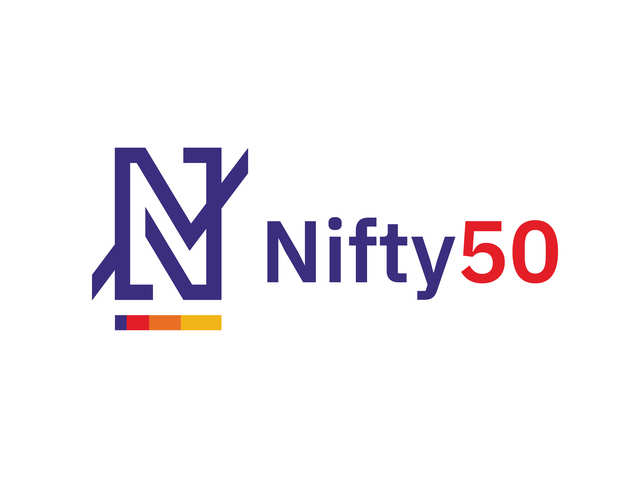

## Nifty 50 Case Study

### NIFTY 50 is a benchmark index for the Indian stock market. It represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange (NSE).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Data/nifty50.csv')
df.head()

,Name,Ticker,Sector,Sub-Sector,Market Cap,Close Price,EPS (Q)
0,Reliance Industries Ltd,RELIANCE,Energy,Oil & Gas - Refining & Marketing,1.624237e+06,2377.45,25.71
1,Tata Consultancy Services Ltd,TCS,Information Technology,IT Services & Consulting,1.285699e+06,3487.60,31.00
2,HDFC Bank Ltd,HDFCBANK,Financials,Private Banks,1.183357e+06,1558.80,22.24
3,ICICI Bank Ltd,ICICIBANK,Financials,Private Banks,6.586391e+05,934.95,15.57
4,Infosys Ltd,INFY,Information Technology,IT Services & Consulting,6.041047e+05,1455.15,15.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         50 non-null     object 
 1   Ticker       50 non-null     object 
 2   Sector       50 non-null     object 
 3   Sub-Sector   50 non-null     object 
 4   Market Cap   50 non-null     float64
 5   Close Price  50 non-null     float64
 6   EPS (Q)      50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [4]:
## Finding Sector Weightage.

In [5]:
sector = df['Sector'].value_counts()
sector

Sector
Financials                10
Materials                  8
Information Technology     6
Consumer Discretionary     6
Consumer Staples           5
Health Care                5
Industrials                4
Energy                     3
Utilities                  2
Communication Services     1
Name: count, dtype: int64

In [6]:
df1 = df['Sector'].unique()
df1

array(['Energy', 'Information Technology', 'Financials',
       'Consumer Staples', 'Communication Services', 'Industrials',
       'Consumer Discretionary', 'Materials', 'Health Care', 'Utilities'],
      dtype=object)

In [7]:
color = df['Sector'].map({ 'Energy':'#004c6d', 'Information Technology':'#255e7e', 'Financials':'#3d708f',
       'Consumer Staples':'#5383a1', 'Communication Services':'#6996b3', 'Industrials':'#7faac6',
        'Materials':'#94bed9', 'Health Care':'#abd2ec', 'Utilities':'#abd2ec','Consumer Discretionary':'#c1e7ff'
                         })

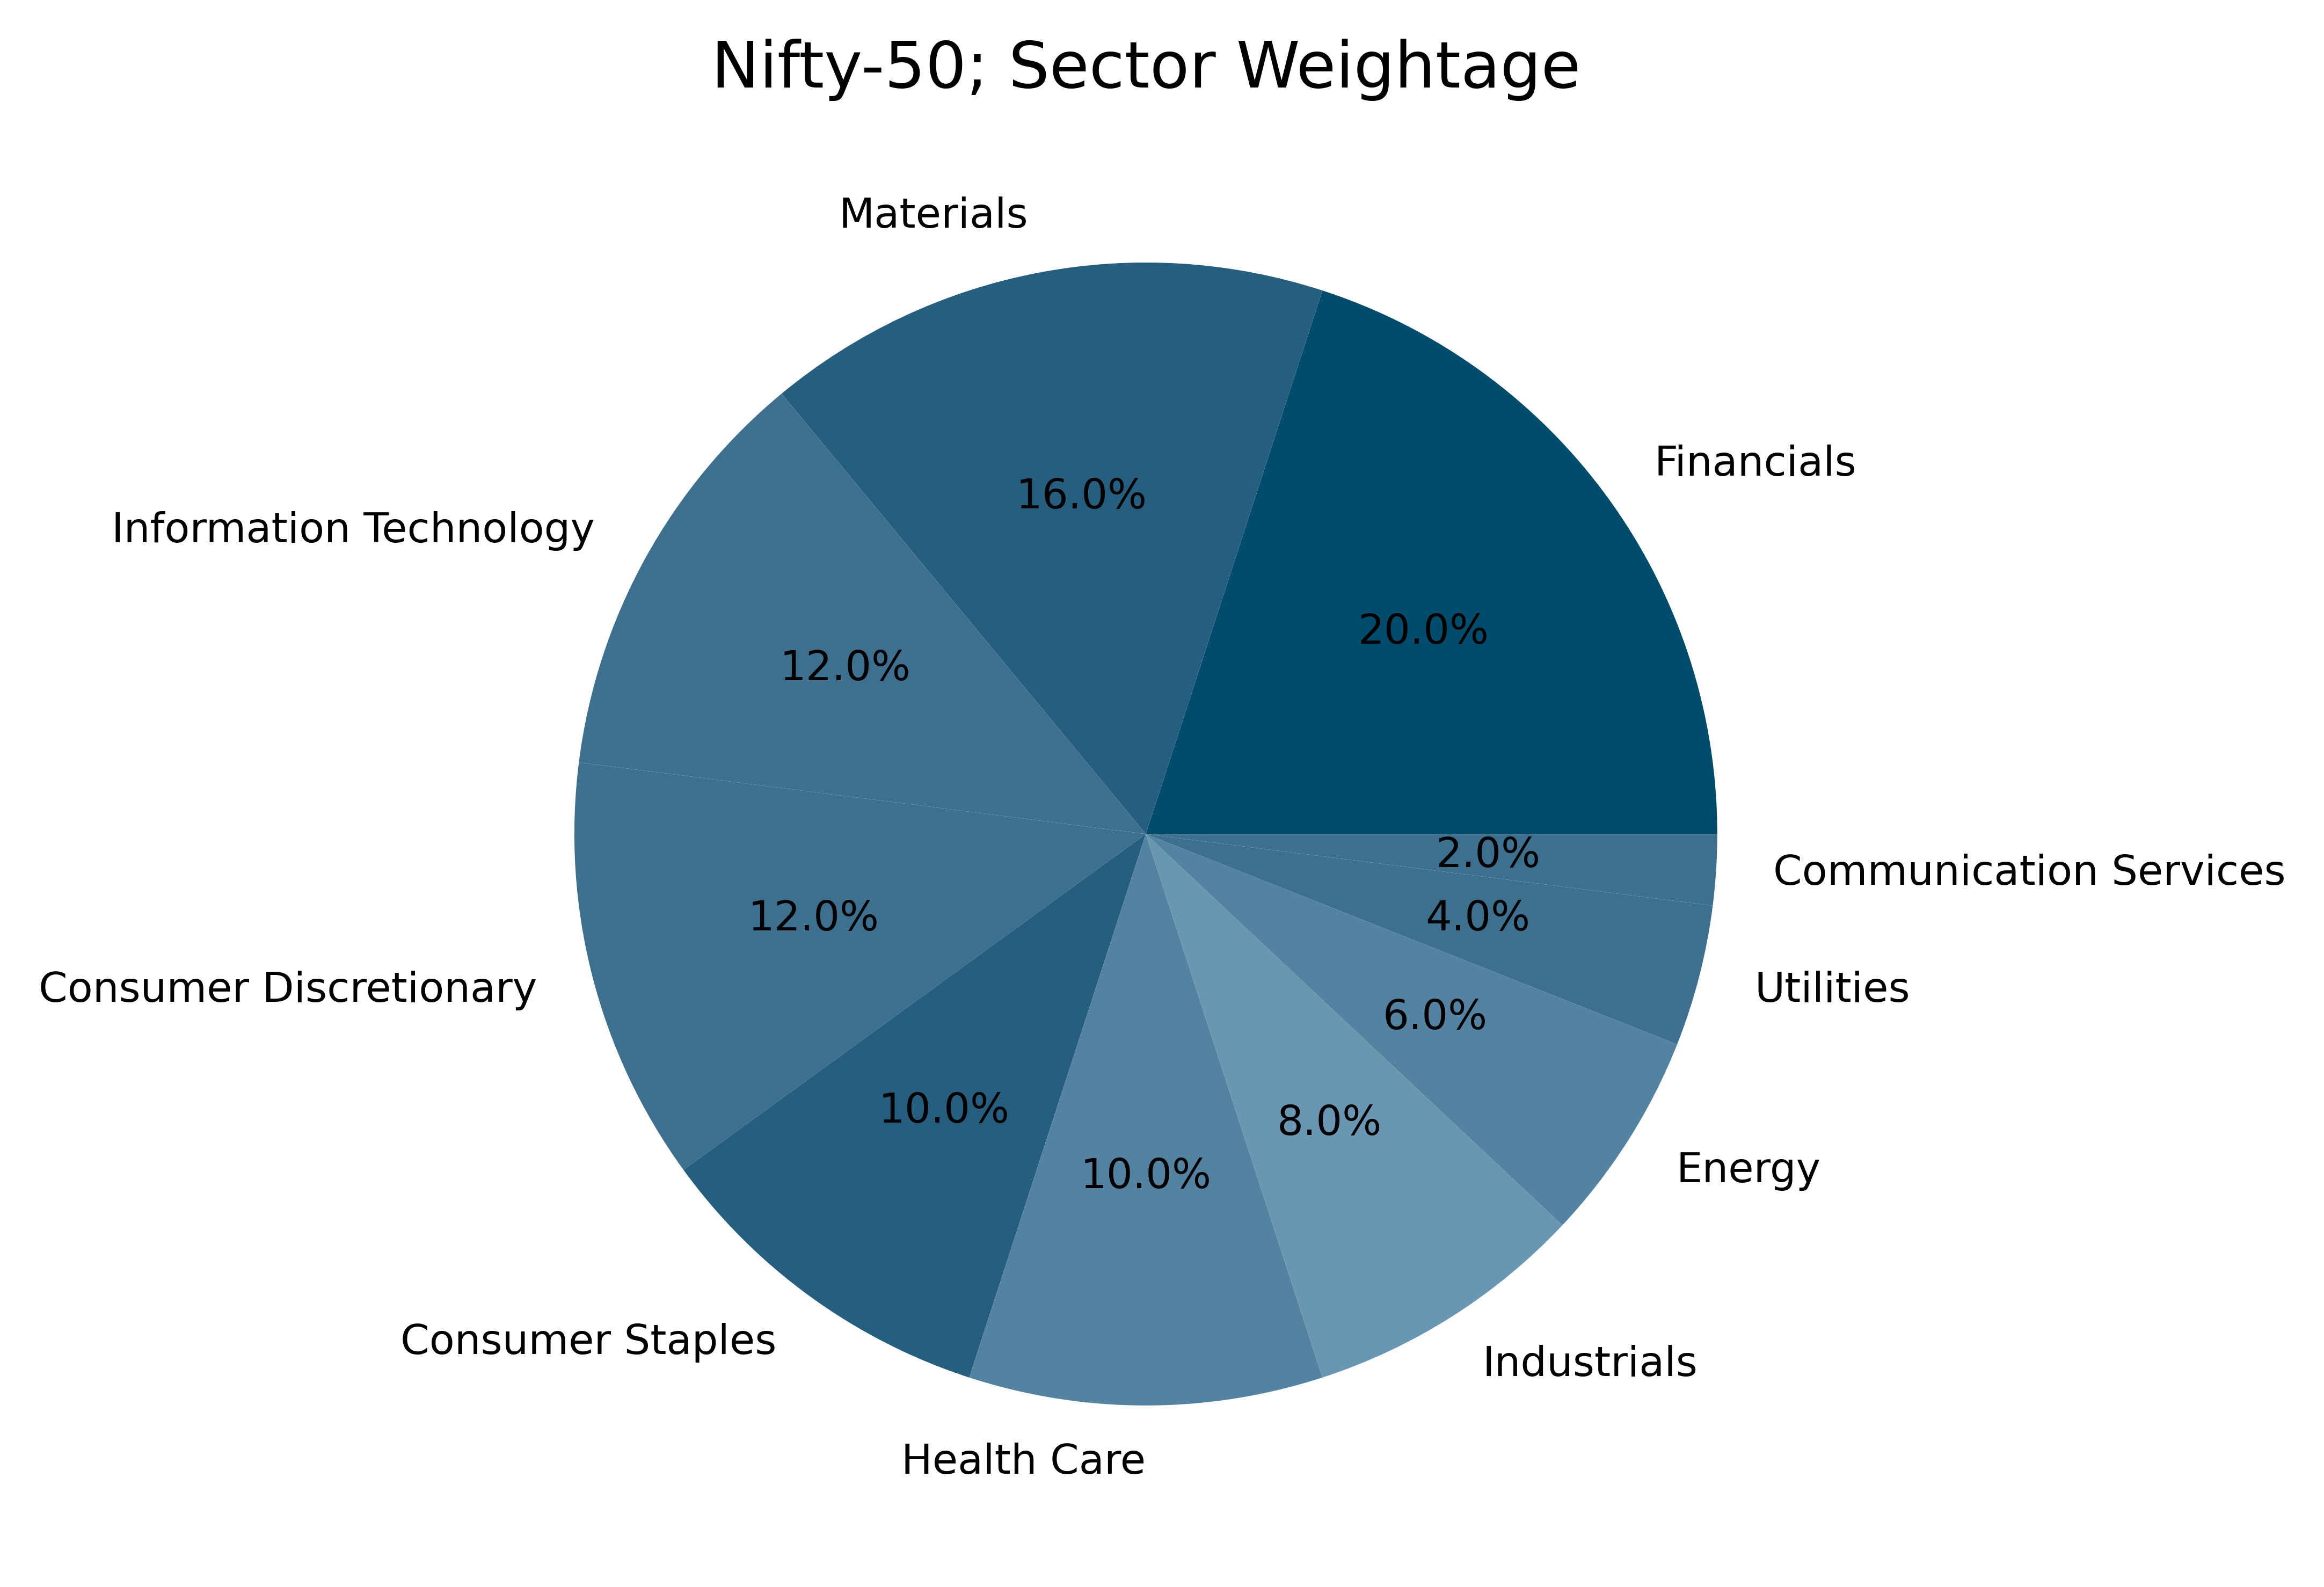

In [8]:
fig = plt.figure(dpi=720)
ax =fig.add_subplot()


ax.pie(sector, labels=sector.index, autopct='%1.1f%%', colors=color, rotatelabels=False, textprops={'fontsize': 7.7})
ax.set_title('Nifty-50; Sector Weightage', )
plt.show()

## Price to Earnings Ratio

### Price to earning ratio = MaketPrice/Earnings per share
 
#### ● The ratio for valuing a company that measures its current share price relative to its per-share earnings
#### ● In general, higher P/E ratio indicates higher growth expectations

In [9]:
prices = np.array(df['Close Price'])
earnings = np.array(df['EPS (Q)'])

In [10]:
prices

array([ 2377.45,  3487.6 ,  1558.8 ,   934.95,  1455.15,  2545.55,
        1014.7 ,   435.8 ,   564.75,  7121.9 ,  3109.2 ,  1340.9 ,
        1755.45,  1074.25, 10608.7 ,  3490.6 ,  3119.9 ,  1225.85,
        2358.55,  1673.5 ,   706.4 ,  9003.65,   261.3 ,   194.95,
       24236.15,   413.05,   342.15,   208.95,  1647.75,   801.1 ,
         825.5 ,  6090.55,  5536.7 ,   127.9 ,   690.75,  1435.25,
        2005.45,  1220.95,   515.65,  4852.65,  1466.1 ,  3896.9 ,
        3788.7 ,  1212.3 ,  5788.15,   435.7 ,   940.75,  5528.95,
        3819.05,   570.65])

In [11]:

earnings

array([ 25.71,  31.  ,  22.24,  15.57,  15.01,  11.3 ,   2.36,   3.93,
        18.04,  58.67,  22.94,  14.15,  22.45,  20.14, 124.61,  10.31,
        12.57,   9.9 ,   2.  ,  12.1 ,   9.81,  44.46,   4.76,  10.92,
        94.18,   5.06,  11.03,   4.06,  21.07,  11.38,   8.09,  71.4 ,
        39.27,  -5.07,   1.76,   3.8 ,  17.73,   5.59,   9.88,  24.41,
        28.36,  37.13,  13.11,  14.01,  89.09,  38.71,   3.64,  16.2 ,
        50.34,  -2.54])

In [12]:
pe_ratio = prices/earnings
pe_ratio

array([  92.47180086,  112.50322581,   70.08992806,   60.04816956,
         96.94536975,  225.2699115 ,  429.95762712,  110.89058524,
         31.30543237,  121.38912562,  135.53618134,   94.76325088,
         78.19376392,   53.33912612,   85.13522189,  338.56450048,
        248.20206842,  123.82323232, 1179.275     ,  138.30578512,
         72.00815494,  202.51124606,   54.89495798,   17.8525641 ,
        257.33860692,   81.63043478,   31.0199456 ,   51.46551724,
         78.20360702,   70.39543058,  102.03955501,   85.30182073,
        140.99057805,  -25.22682446,  392.47159091,  377.69736842,
        113.1105471 ,  218.41681574,   52.19129555,  198.79762392,
         51.69605078,  104.9528683 ,  288.99313501,   86.53104925,
         64.96969357,   11.25548954,  258.4478022 ,  341.29320988,
         75.8651172 , -224.66535433])

In [13]:
## Addding pe_ratio into the Data frame 

In [14]:
df['PE-Ratio (Q)'] = pe_ratio
df.head()

,Name,Ticker,Sector,Sub-Sector,Market Cap,Close Price,EPS (Q),PE-Ratio (Q)
0,Reliance Industries Ltd,RELIANCE,Energy,Oil & Gas - Refining & Marketing,1.624237e+06,2377.45,25.71,92.471801
1,Tata Consultancy Services Ltd,TCS,Information Technology,IT Services & Consulting,1.285699e+06,3487.60,31.00,112.503226
2,HDFC Bank Ltd,HDFCBANK,Financials,Private Banks,1.183357e+06,1558.80,22.24,70.089928
3,ICICI Bank Ltd,ICICIBANK,Financials,Private Banks,6.586391e+05,934.95,15.57,60.048170
4,Infosys Ltd,INFY,Information Technology,IT Services & Consulting,6.041047e+05,1455.15,15.01,96.945370


### Hence, 20% of nifty 50 consists of Financials sectors, lets Analyses PE of Finanical sector. 

In [15]:
fin =df.loc[(df['Sector'] == 'Financials')]
fin

,Name,Ticker,Sector,Sub-Sector,Market Cap,Close Price,EPS (Q),PE-Ratio (Q)
2,HDFC Bank Ltd,HDFCBANK,Financials,Private Banks,1.183357e+06,1558.80,22.24,70.089928
3,ICICI Bank Ltd,ICICIBANK,Financials,Private Banks,6.586391e+05,934.95,15.57,60.048170
8,State Bank of India,SBIN,Financials,Public Banks,5.074534e+05,564.75,18.04,31.305432
9,Bajaj Finance Ltd,BAJFINANCE,Financials,Consumer Finance,4.402776e+05,7121.90,58.67,121.389126
12,Kotak Mahindra Bank Ltd,KOTAKBANK,Financials,Private Banks,3.490228e+05,1755.45,22.45,78.193764
13,Axis Bank Ltd,AXISBANK,Financials,Private Banks,3.268163e+05,1074.25,20.14,53.339126
19,Bajaj Finserv Ltd,BAJAJFINSV,Financials,Insurance,2.631619e+05,1673.50,12.10,138.305785
34,HDFC Life Insurance Company Ltd,HDFCLIFE,Financials,Insurance,1.452520e+05,690.75,1.76,392.471591
35,SBI Life Insurance Company Ltd,SBILIFE,Financials,Insurance,1.409485e+05,1435.25,3.80,377.697368
40,Indusind Bank Ltd,INDUSINDBK,Financials,Private Banks,1.153614e+05,1466.10,28.36,51.696051


### Lets focus on priviate banking in financial sector

In [16]:
pb = df.loc[(df['Sector'] == 'Financials') & (df['Sub-Sector']=='Private Banks')]
pb

,Name,Ticker,Sector,Sub-Sector,Market Cap,Close Price,EPS (Q),PE-Ratio (Q)
2,HDFC Bank Ltd,HDFCBANK,Financials,Private Banks,1.183357e+06,1558.80,22.24,70.089928
3,ICICI Bank Ltd,ICICIBANK,Financials,Private Banks,6.586391e+05,934.95,15.57,60.048170
12,Kotak Mahindra Bank Ltd,KOTAKBANK,Financials,Private Banks,3.490228e+05,1755.45,22.45,78.193764
13,Axis Bank Ltd,AXISBANK,Financials,Private Banks,3.268163e+05,1074.25,20.14,53.339126
40,Indusind Bank Ltd,INDUSINDBK,Financials,Private Banks,1.153614e+05,1466.10,28.36,51.696051


### lets find the Sector PE and its valutaion of private banks in nifty-50 on last Q

In [17]:
avgpb_price = sum(pb['Close Price']) / len(pb['Close Price'])
avgpb_eps = sum(pb['EPS (Q)']) / len(pb['EPS (Q)']) 
pb_sector_pe = avgpb_price/avgpb_eps 
print(f"PE Ratio for the Private Bank sector on Nifty 50: {pb_sector_pe}")

PE Ratio for the Private Bank sector on Nifty 50: 62.42690327326221


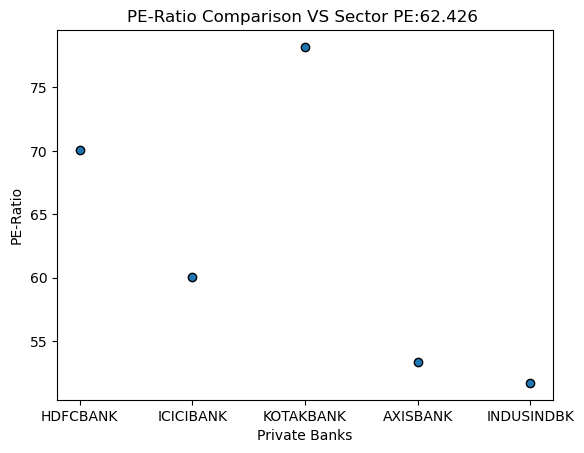

In [18]:
fig = plt.figure()
ax = fig.add_subplot()


ax.scatter(pb['Ticker'], pb['PE-Ratio (Q)'], edgecolors='black', )

ax.set_title('PE-Ratio Comparison VS Sector PE:62.426 ')
ax.set_xlabel('Private Banks')
ax.set_ylabel('PE-Ratio')
plt.show()

## Conclusion

### Analysing PE-Ratio of Nifty 50 and comapring with Sector PE of Private Banks, ICICI Bank Ltd , Axis Bank Ltd, Indusind Bank Ltd are Undervalued as per PE ratio. 